# Zero Shot Evaluation Tutorial

## Step 1: Setup

In [ ]:
# Download example dataset (pbmc12k) from `scvi.data.pbmc_dataset` package.
# Set up the environment.
from embedding_extractors.setup import download_scgpt_model, download_geneformer_model, download_genept_data

download_scgpt_model()
download_geneformer_model()
download_genept_data()

## Step 2: Extract cell embeddings

#### a) Pre process raw expression metrics

In [14]:
# Pre-process filtered cell expression metrics (no further processes are needed).

# Set up configurations for the pre-processor, example configs can be found in `embedding_extractors/config.py`.
preprocessor_configs = dict(
    # The directory to store raw data.
    # Note: Currently only accept Anndata files with gene names in `vars`. The supported gene naming system includes
    # "gene_symbol", "ensembl_id", "entrez_id", "refseq_id".
    raw_data_directory='pmbc_12k/',
    # The directory to store preprocessed data.
    preprocessed_data_directory='pbmc/pre_processed',
    # The column name of gene ID in `adata.var`. If the gene ID is the index, input `index`.
    gene_id_col_name='index',
    # The type of gene naming system in the gene ID: {"gene_symbol", "ensembl_id", "entrez_id", "refseq_id"}.
    gene_id_type='ensembl_id',
    # The input file format. Currently only Anndata is supported.
    file_format='h5ad',
    # Whether to keep batch key. If true, the input file directory name will be used as the batch key and stored under
    # `adata.obs.batch_key`.
    keep_batch_key=True,
    # Subsample ratio of raw gene expressions, range (0, 1]. If the value is 1, all gene expressions will be included.
    gene_expression_subsample_ratio=1,
    # Map of cell attribute labels in `obs` to keep. Key is the name in original file, value is the name in
    # pre-processed file. If none, use empty map {}.
    custom_cell_attr_names={'str_labels': 'cell_type'},
)

In [15]:
from embedding_extractors import pre_processor

processor = pre_processor.PreProcessor()
processor.pre_process(preprocessor_configs)

Pre-processing pmbc_12k\pbmc_12k.h5ad
Pre-process completed: pbmc/pre_processed\pbmc_12k.h5ad. Shape:
AnnData object with n_obs × n_vars = 11990 × 3346
    obs: 'n_counts', 'batch', 'labels', 'str_labels', 'cell_type', 'batch_key', 'original_n_counts'
    var: 'key_0', 'gene_symbols', 'n_counts-0', 'n_counts-1', 'n_counts', 'ensembl_id', 'gene_symbol', 'entrez_id', 'refseq_id'
    uns: 'cell_types'
    obsm: 'design', 'normalized_qc', 'qc_pc', 'raw_qc'
Successfully pre-processed 1 out of 1 file(s).


#### b) Tokenize and extract cell embeddings

In [19]:
# Generate cell embeddings with Geneformer.
"""
Geneformer configs
"""
geneformer_configs = dict(
    # The directory to store preprocessed data.
    preprocessed_data_directory='pbmc/pre_processed',
    # The output tokenized file directory.
    tokenized_file_directory="pbmc/tokenized",
    # The output tokenized filename prefix.
    tokenized_file_prefix='geneformer',
    # The output embedding file directory.
    embedding_output_directory="pbmc",
    # The output embedding file name.
    embedding_output_filename="geneformer_cell_embeddings",
    # List of cell attribute labels to keep, i.e. `cell_type` and `batch_key`. If none, use empty list [].
    custom_cell_attr_names=['cell_type', 'batch_key'],
)

from embedding_extractors import EmbeddingExtractor

emb_extractor = EmbeddingExtractor("Geneformer", output_file_type='h5ad', configs=geneformer_configs)
emb_extractor.tokenize()
emb_extractor.extract_embeddings()

Tokenizing pbmc\pre_processed\pbmc_12k.h5ad


100%|██████████| 24/24 [00:00<00:00, 51.50it/s]


pbmc\pre_processed\pbmc_12k.h5ad has no column attribute 'filter_pass'; tokenizing all cells.
Tokenizing pbmc\pre_processed\pbmc_59k.h5ad


100%|██████████| 117/117 [00:22<00:00,  5.12it/s]


pbmc\pre_processed\pbmc_59k.h5ad has no column attribute 'filter_pass'; tokenizing all cells.
Tokenizing pbmc\pre_processed\pbmc_67k.h5ad


100%|██████████| 131/131 [00:09<00:00, 14.36it/s]


pbmc\pre_processed\pbmc_67k.h5ad has no column attribute 'filter_pass'; tokenizing all cells.
Creating dataset.


Saving the dataset (2/2 shards): 100%|██████████| 138481/138481 [00:00<00:00, 668459.81 examples/s]


Tokenization completed for Geneformer.
Extracting Geneformer embeddings


100%|██████████| 13849/13849 [1:15:04<00:00,  3.07it/s]


Output embedding in pbmc\geneformer_cell_embeddings.h5ad



In [18]:
# Generate cell embeddings with scGPT.
"""
scGPT configs
"""
scgpt_configs = dict(
    # The directory to store preprocessed data.
    preprocessed_data_directory='pbmc/pre_processed',
    # The output embedding file directory.
    embedding_output_directory="pbmc",
    # The output embedding file name.
    embedding_output_filename="scgpt_cell_embeddings",
    # List of cell attribute labels to keep, i.e. `cell_type` and `batch_key`. If none, use empty list [].
    custom_cell_attr_names=['cell_type', 'batch_key'],
)

from embedding_extractors import EmbeddingExtractor

emb_extractor = EmbeddingExtractor("scGPT", output_file_type='h5ad', configs=scgpt_configs)
emb_extractor.tokenize()
emb_extractor.extract_embeddings()

Extracting scGPT embeddings
Embedding pbmc/pre_processed\pbmc_12k.h5ad


Embedding cells: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


Embedding pbmc/pre_processed\pbmc_59k.h5ad


Embedding cells: 100%|██████████| 930/930 [02:21<00:00,  6.57it/s]


Embedding pbmc/pre_processed\pbmc_67k.h5ad


Embedding cells: 100%|██████████| 1047/1047 [02:41<00:00,  6.47it/s]


Output embedding in pbmc\scgpt_cell_embeddings.h5ad


In [17]:
# Generate cell embeddings with GenePT-w.

"""
genePT configs
"""
genept_configs = dict(
    # The directory to store preprocessed data.
    preprocessed_data_directory='pbmc/pre_processed',
    # The output embedding file directory for genePT-w.
    genept_w_embedding_output_directory="pbmc",
    # The output embedding file name.
    embedding_output_filename="genept_w_cell_embeddings",
    # List of cell attribute labels to keep, i.e. `cell_type` and `batch_key`. If none, use empty list [].
    custom_cell_attr_names=['cell_type', 'batch_key'],
)

from embedding_extractors import EmbeddingExtractor

emb_extractor = EmbeddingExtractor("genePT-w", output_file_type='h5ad', configs=genept_configs)
emb_extractor.tokenize()
emb_extractor.extract_embeddings()

Extracting genePT-W embeddings
Embedding pbmc/pre_processed\pbmc_12k.h5ad
Unable to match 24 out of 3346 genes in pbmc/pre_processed\pbmc_12k.h5ad
Embedding pbmc/pre_processed\pbmc_59k.h5ad
Unable to match 6313 out of 23948 genes in pbmc/pre_processed\pbmc_59k.h5ad
Embedding pbmc/pre_processed\pbmc_67k.h5ad
Unable to match 15196 out of 36263 genes in pbmc/pre_processed\pbmc_67k.h5ad
Output embedding in pbmc\genept_w_cell_embeddings.h5ad



In [ ]:
# Generate cell embeddings with GenePT-s.

"""
genePT configs
"""
genept_configs = dict(
    # The directory to store preprocessed data.
    preprocessed_data_directory='pbmc/pre_processed',
    # The output embedding file directory for genePT-s.
    genept_s_embedding_output_directory="pbmc",
    # The used openai model name.
    genept_s_openai_model_name='text-embedding-ada-002',
    # The output embedding file name.
    embedding_output_filename="genept_s_cell_embeddings",
    # OpenAI api key.
    openai_api_key='',  # remember to set your open AI API key!
    # List of cell attribute labels to keep, i.e. `cell_type` and `batch_key`. If none, use empty list [].
    custom_cell_attr_names=['cell_type', 'batch_key'],
)
from embedding_extractors import EmbeddingExtractor

emb_extractor = EmbeddingExtractor("genePT-s", output_file_type='h5ad', configs=genept_configs)
emb_extractor.tokenize()
emb_extractor.extract_embeddings()

Extracting genePT-s embeddings
Embedding pbmc20k/pre_processed\pbmc20k.h5ad
Processing 0 out of 23837 cells...
Processing 100 out of 23837 cells...
Processing 200 out of 23837 cells...
Processing 300 out of 23837 cells...
Processing 400 out of 23837 cells...
Processing 500 out of 23837 cells...
Processing 600 out of 23837 cells...
Processing 700 out of 23837 cells...
Processing 800 out of 23837 cells...
Processing 900 out of 23837 cells...
Processing 1000 out of 23837 cells...
Processing 1100 out of 23837 cells...
Processing 1200 out of 23837 cells...
Processing 1300 out of 23837 cells...
Processing 1400 out of 23837 cells...
Processing 1500 out of 23837 cells...
Processing 1600 out of 23837 cells...
Processing 1700 out of 23837 cells...
Processing 1800 out of 23837 cells...
Processing 1900 out of 23837 cells...
Processing 2000 out of 23837 cells...
Processing 2100 out of 23837 cells...
Processing 2200 out of 23837 cells...
Processing 2300 out of 23837 cells...
Processing 2400 out of 2

## Step 3: Zero-shot Evaluation

#### a) Cell type labeling

Evaluating scGPT model: 103526 out of 138481 cell embeddings after filtering.
	Cell embeddings shape: (103526, 512)
Evaluating Geneformer model: 103526 out of 138481 cell embeddings after filtering.
	Cell embeddings shape: (103526, 896)
Evaluating genePT-w model: 103526 out of 138481 cell embeddings after filtering.
	Cell embeddings shape: (103526, 1536)


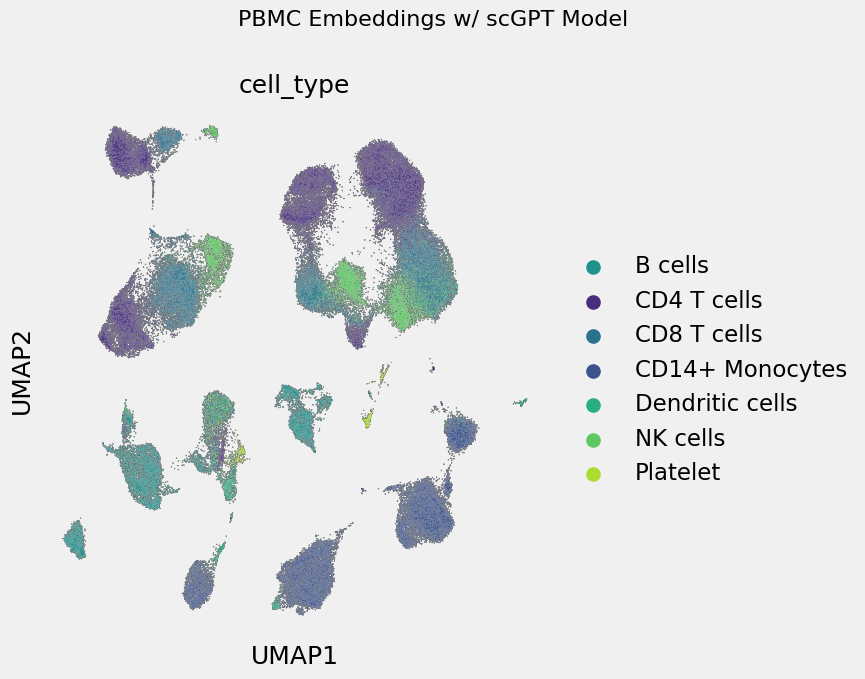

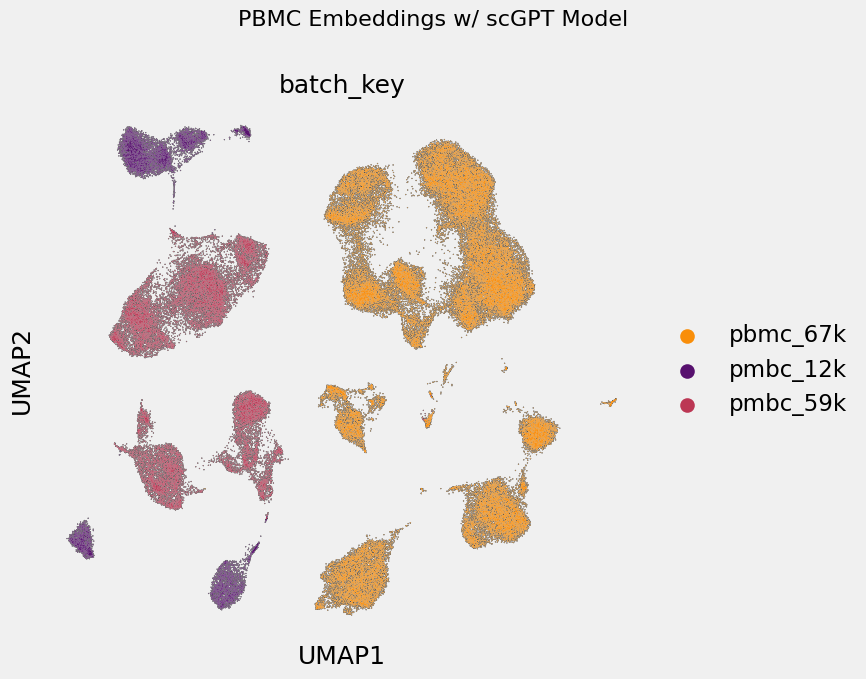

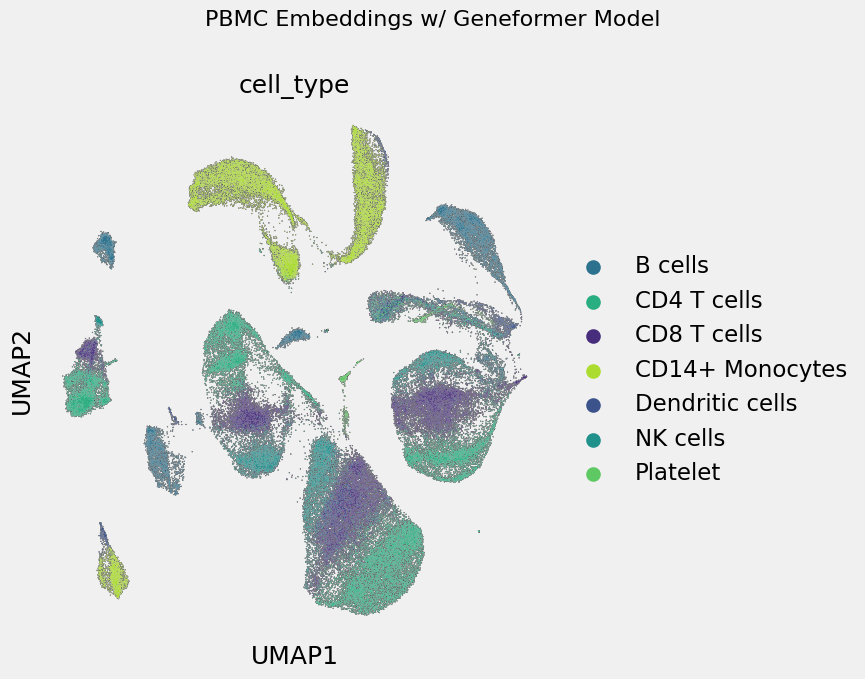

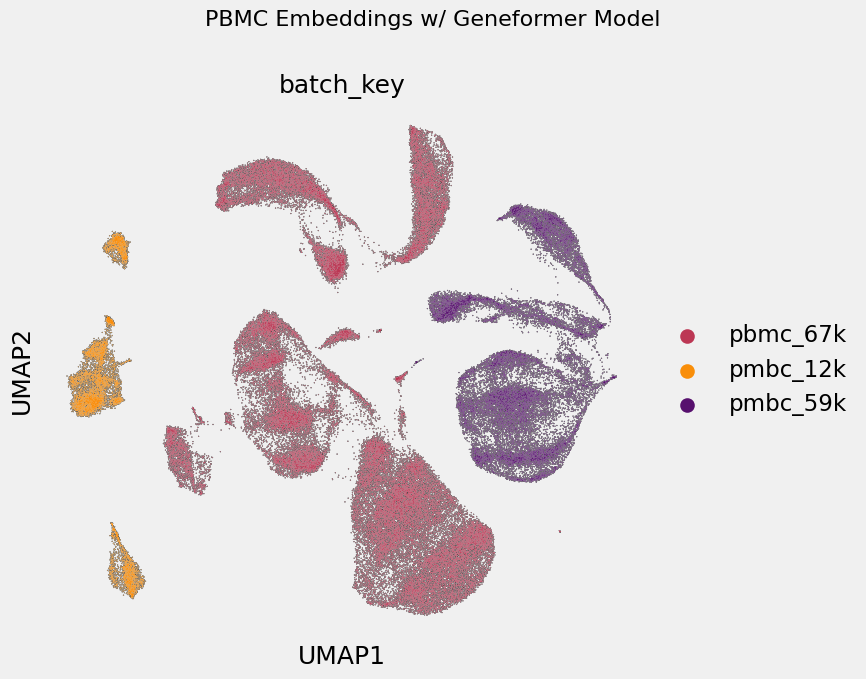

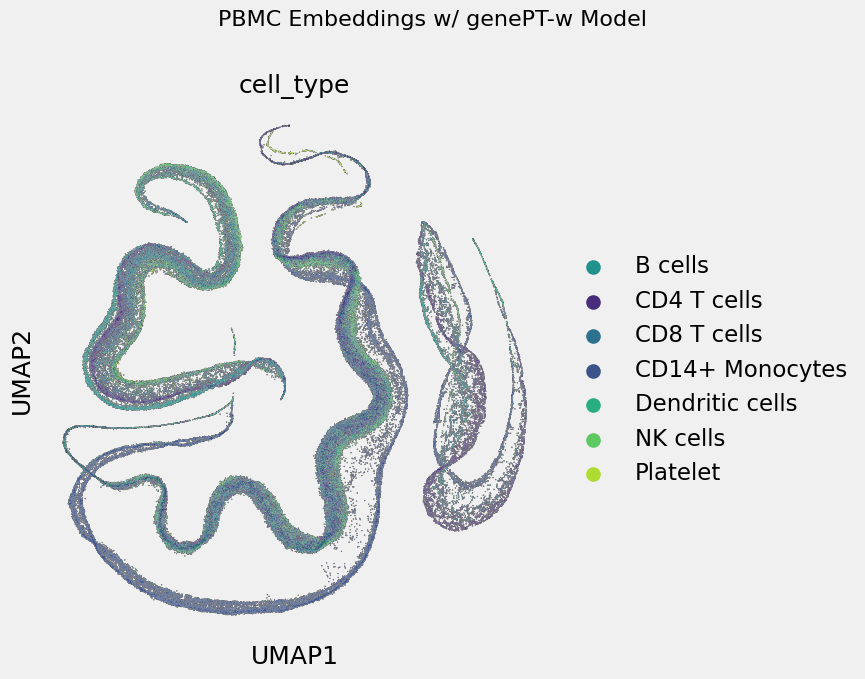

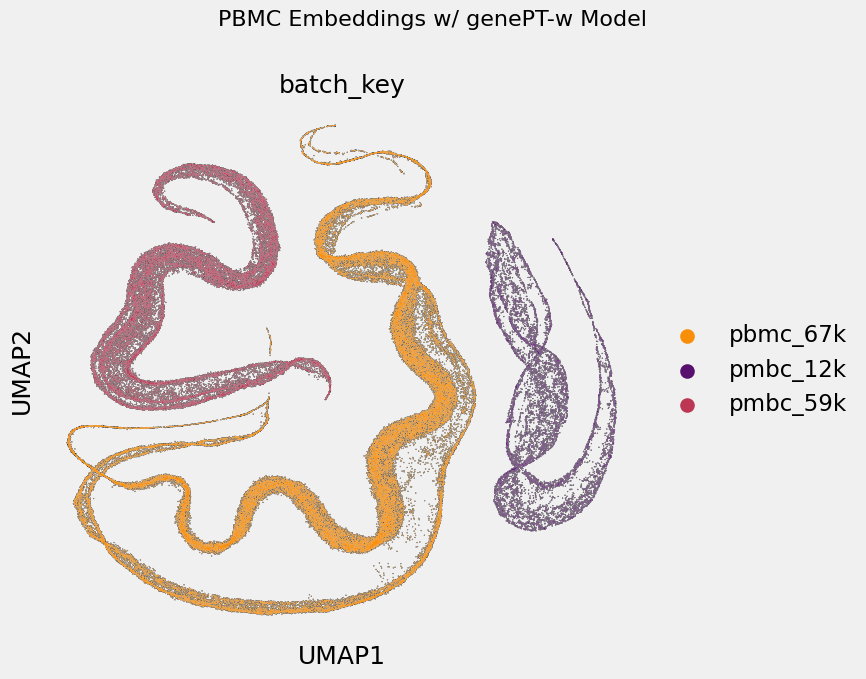

In [1]:
from eval import ZeroShotCellEmbeddingsEval
import warnings

warnings.filterwarnings("ignore")

# Generate UMAPs for cell embeddings.
for model in {"scGPT", "genePT-w", "Geneformer"}:
    eval = ZeroShotCellEmbeddingsEval(model_name=model,
                                      embedding_file_path=f'pbmc/{model.lower().replace("-", "_")}_cell_embeddings.h5ad',
                                      output_dir=f'pbmc/eval/',
                                      label_key=['cell_type'],
                                      label_key_filter=[['B cells', 'Dendritic cells', 'CD4 T cells', 'CD8 T cells',
                                                         'CD14+ Monocytes', 'Platelet', 'NK cells']],
                                      batch_key='batch_key')
    eval.visualize(return_fig=False, plot_title=f"PBMC Embeddings w/ {model} Model",
                   plot_type='scanpy',
                   n_cells=-1,
                   embedding_key=f"X_{model}")

In [4]:
from eval import ZeroShotCellEmbeddingsEval
import warnings

warnings.filterwarnings("ignore")

# Calculates cluster metrics for cell embeddings.
for model in {"scGPT", "genePT-w", "Geneformer"}:
    eval = ZeroShotCellEmbeddingsEval(model_name=model,
                                      embedding_file_path=f'pbmc/{model.lower().replace("-", "_")}_cell_embeddings.h5ad',
                                      output_dir=f'pbmc/eval/',
                                      label_key=['cell_type'],
                                      label_key_filter=[['B cells', 'Dendritic cells', 'CD4 T cells', 'CD8 T cells',
                                                         'CD14+ Monocytes', 'Platelet', 'NK cells']],
                                      batch_key='batch_key')
    print(eval.evaluate(n_cells=7500, embedding_key=f"X_{model}"))
    print('\n')

Evaluating scGPT model: 103526 out of 138481 cell embeddings after filtering.
adata_ has 103526 cells. Taking a subset of 7500 cells.
              metric      label     value
0  NMI_cluster/label  cell_type  0.554722
1  ARI_cluster/label  cell_type  0.312943
2          ASW_label  cell_type  0.561186
3         graph_conn  cell_type  0.892236
4          ASW_batch  cell_type  0.578638
5    ASW_label/batch  cell_type  0.729726
6          PCR_batch  cell_type  0.211162
7            avg_bio  cell_type  0.476284


Evaluating Geneformer model: 103526 out of 138481 cell embeddings after filtering.
adata_ has 103526 cells. Taking a subset of 7500 cells.
              metric      label     value
0  NMI_cluster/label  cell_type  0.513684
1  ARI_cluster/label  cell_type  0.289020
2          ASW_label  cell_type  0.531371
3         graph_conn  cell_type  0.759644
4          ASW_batch  cell_type  0.648709
5    ASW_label/batch  cell_type  0.593334
6          PCR_batch  cell_type  0.422382
7          